This dataset is from a competition hosted by kaggle. The dataset itself is an extended version of the Boston city house prices dataset compiled by Dean de Cock. 
In this kernel, i am going to do a analysis following this pipeline:
1. **Understand the problem.** I will dive deep into the meaning of each variable and the importance of each variable available in the dataset
2. **Univariable study.** I will focus on a dependent variable ("SalePrice) to know more about it
3. **Multivariate study** I will try to understand the relationship between the dependent variable and the independent variable
4. **Basic Cleaning** I will clean the dataset, handle missing values, outliers and categorical values.
5. **Hypothesis Testing** I will do some hypothesis testing the test some of my assumptions.

In [77]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [78]:
df_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [79]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Understanding the data
In order to understand the data we must have some definition of what we can expect from an attributes of the data. Here is my criteria when i am trying to comprehend an attributes:
* **Type.** The type of the data is always important as it can defines what techniques we need to apply to do some predictions or analysis
* **Segment** It is of utmost important to put variabels into different segment of the events to gauge the importance of the variables to the overall dependent variable that we are trying to analyze. In this case, i decide to split it into 3 segments, building which is physical characteristics of the building, location which is information about whatever is around the house, and space is the parameter of the house
* **Expectation** This means that we have to evaluate the expected influence of different variables on the dependent variables.
* **Comments** Any general comments that occurs
Now let's start this tedious process:
1. **MSSubClass** This attributes identifies the type of the house, its size, and the types of people living in it. This is a categorical values and can be in all 3 of my segments but the categories itself is nominal so it have impact on sale price.
2. **MSZoning** This attributes identifies the area or zone of the house. It can be in the segment of location and the value is also nominal so it might have an impact on sale price.
3. **LotFrontage** This identifies the linear feet of street connected to the house. This is a numerical values in the location segment, but i don't think people will care if their house have a few more feet of street so i will determine this variables to be of low impact
4. **LotArea** This identifies the total area of the land. This is a numerical values and it might have a high impact on the price of the house.
5. **...**

Because there are a lot of variables so i will pick out some for testing and ploting the check their influence on saleprice. From what i can see these are the few variables i decided on:
* LotArea
* OverallQual (the overall build quality of the house)
* OverallCond (the overall condition of the house as of now)
* TotalBsmtSF (Total space of the basement)
* GrLivArea (the area of living above ground)
* YearBuilt (the year house was built)

# Univariable & Multivariate study
Let's start by analyzing the variable we want "SalePrice"

In [80]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

From what i can see the mean and median is pretty close as well as the minimum value is also larger than zero which is prefect if we want to use this to train a prediction model.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


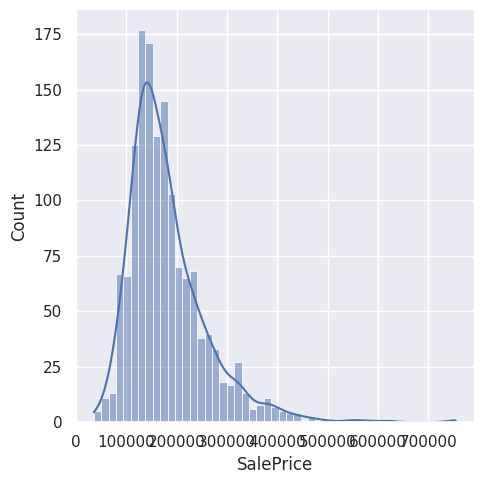

In [81]:
sns.displot(df_train['SalePrice'],kde=True);

As can be seen, the dataset do not follow a normal distributions as well as having skewness. In order to further gauge the skewness i will be calculating it.

In [82]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


**Relationship with numerical variables**

Let's start with the variable "GrLivArea"

<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

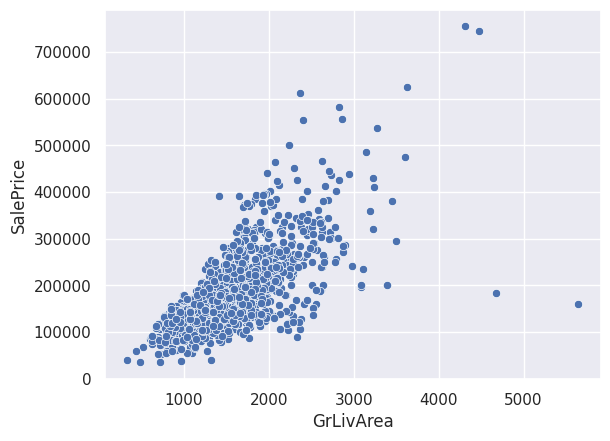

In [83]:
sns.scatterplot(y=df_train['SalePrice'], x=df_train['GrLivArea'])

It seems that the variable GrLivArea have a positive linear realtionships with SalePrice. In order to further test the correlation between these i will do a Spearman test

In [84]:
stats.spearmanr(df_train['SalePrice'],df_train['GrLivArea'])

SignificanceResult(statistic=0.7313095834659141, pvalue=1.4310154533091797e-244)

It is sure that these two variables have a positive relation.
Now let's move on to "LotArea"

<Axes: xlabel='LotArea', ylabel='SalePrice'>

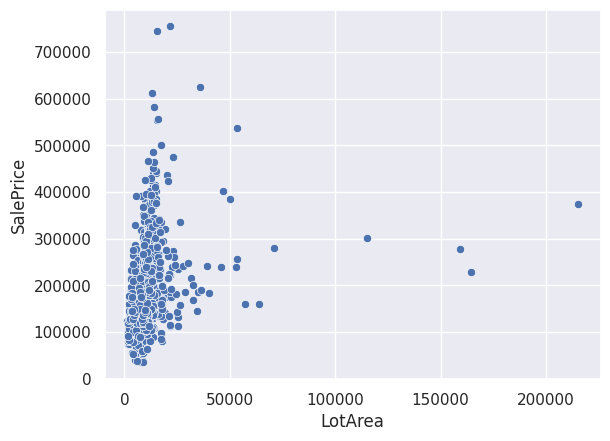

In [85]:
sns.scatterplot(y=df_train['SalePrice'],x=df_train['LotArea'])

In my opinion i thought that the size of the lot will have some correlation with the price it seems that i was wrong but let's calculate the spearman correlation to be sure.

In [86]:
stats.spearmanr(df_train['SalePrice'],df_train['LotArea'])

SignificanceResult(statistic=0.45646058339121154, pvalue=4.8715809571699295e-76)

This is kind of surprising even though it looks like there aren't any realtionship but there is somewhat of a realtionship between these 2 variables.

In [87]:
df_train['LotArea'].describe()

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64

As you can see the maximum value is very high, it is more than 20 times the mean value so i will try to cut the size of the dataset to remove some outliers to more clearly see the realtionship of these 2 variables

In [88]:
new_df = df_train[(df_train.LotArea <40000)]
loss = (1 - (len(new_df)/len(df_train)))*100
print('Data loss: %f%%' % loss )

Data loss: 0.958904%


We only lose about 1 percent of our data so it is still relatively accurate

<Axes: xlabel='LotArea', ylabel='SalePrice'>

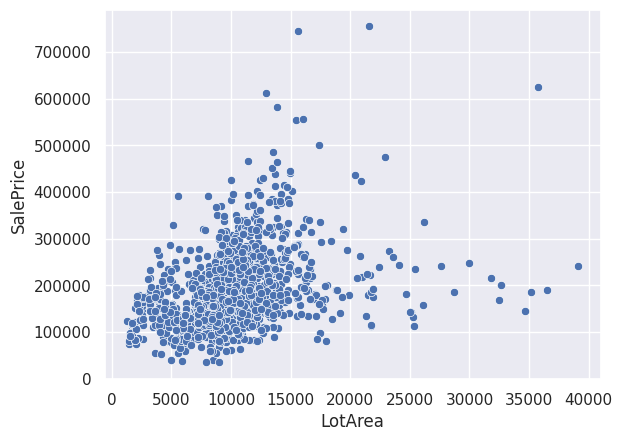

In [89]:
sns.scatterplot(y=new_df['SalePrice'],x=new_df['LotArea'])

In [90]:
stats.spearmanr(new_df['SalePrice'],new_df['LotArea'])

SignificanceResult(statistic=0.4472426181072568, pvalue=4.910669641405187e-72)

Well, i did not expect the correlation score to drop so i guess it is not worth it to remove some of the outliers.

Now let's move on to "TotalBsmtSF"

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

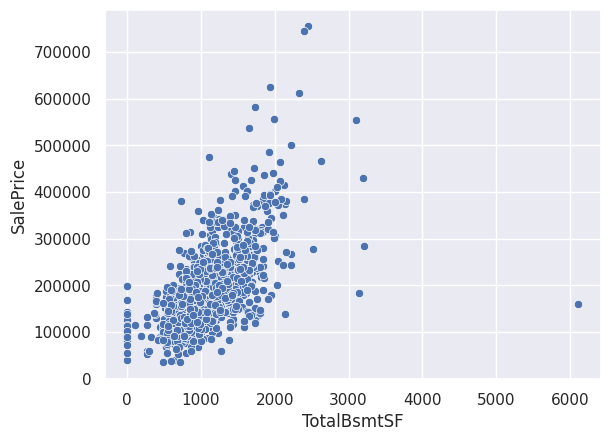

In [91]:
sns.scatterplot(y=df_train['SalePrice'],x=df_train['TotalBsmtSF'])

We can clearly see the positive correlation between these variables. But to put it into number let's calculate the correlation by using spearman formula.

In [92]:
stats.spearmanr(df_train['SalePrice'],df_train['TotalBsmtSF'])

SignificanceResult(statistic=0.6027254448924096, pvalue=4.157299803636561e-145)

As can be seen from the calculations this also presented with high correlation numbers.

This is all the numerical variables available in my list of picked variables.

**Categorical Variables**


<Axes: xlabel='OverallQual', ylabel='SalePrice'>

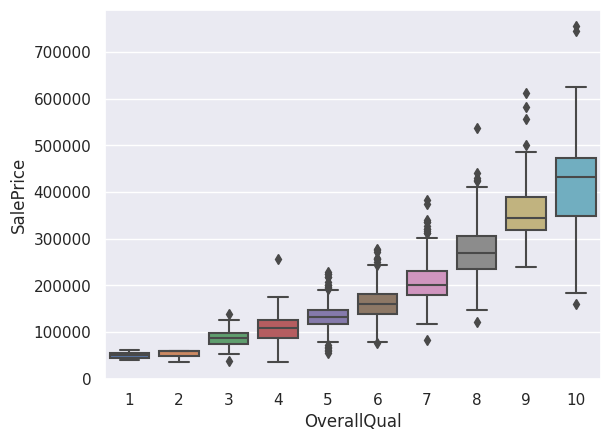

In [93]:
sns.boxplot(x=df_train['OverallQual'], y=df_train['SalePrice'])

In [94]:
stats.spearmanr(df_train['OverallQual'],df_train['SalePrice'])

SignificanceResult(statistic=0.8098285862017292, pvalue=0.0)

<Axes: xlabel='OverallCond', ylabel='SalePrice'>

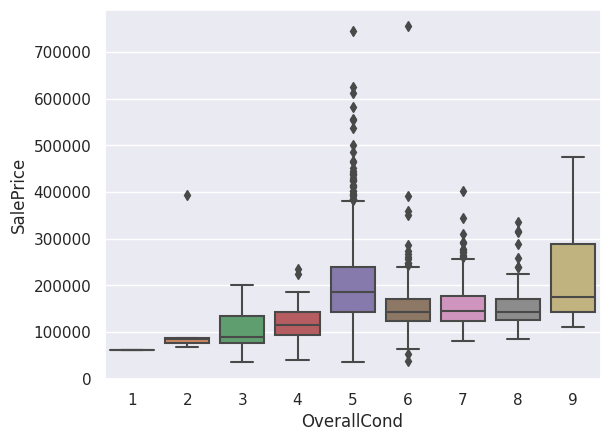

In [95]:
sns.boxplot(x=df_train['OverallCond'],y=df_train['SalePrice'])

In [96]:
stats.spearmanr(df_train['OverallCond'],df_train['SalePrice'])

SignificanceResult(statistic=-0.12932494660061317, pvalue=7.118552262128728e-07)

<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

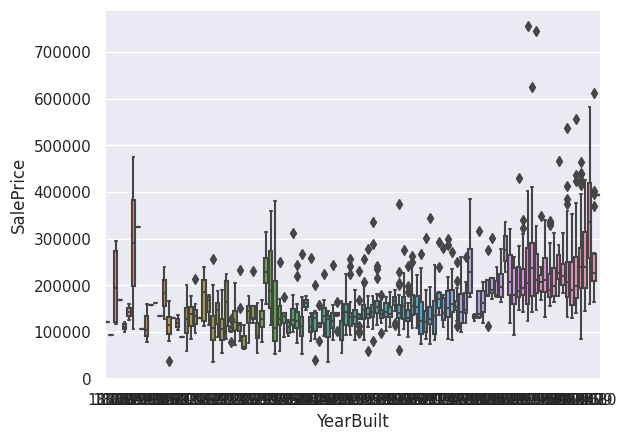

In [97]:
sns.boxplot(x=df_train['YearBuilt'],y=df_train['SalePrice'])

In [98]:
stats.spearmanr(df_train['YearBuilt'],df_train['SalePrice'])

SignificanceResult(statistic=0.6526815462850586, pvalue=5.693840951687133e-178)

<Axes: >

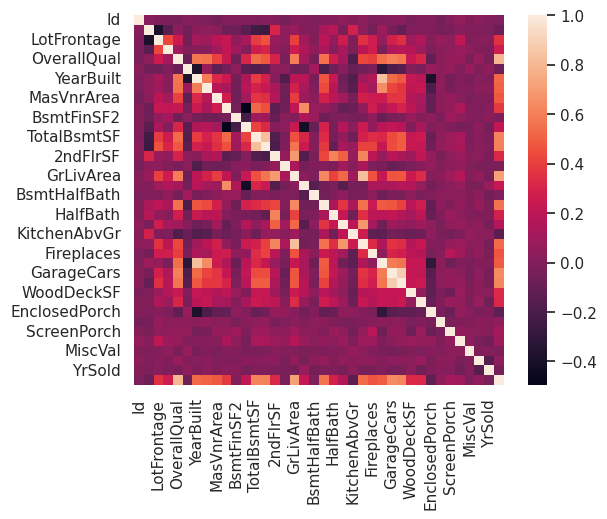

In [99]:
num_df = df_train.select_dtypes(include=['int64', 'float64'])
sns.heatmap(num_df.corr(),square=True)

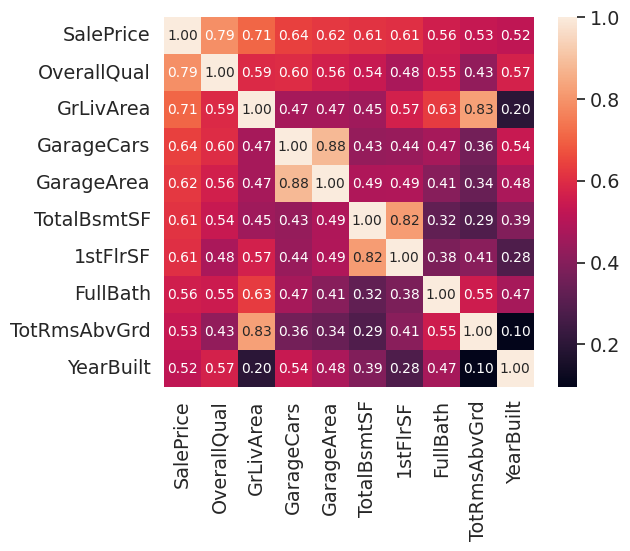

In [100]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = num_df.corr().nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3

# Cleaning the data
After the the analysis let's now start cleaning the data up. We will start by handling missing values.

In [ ]:
missing_total = df_train.isnull().sum().sort_values(ascending=False)
missing_percent = ((df_train.isnull().sum()/df_train.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([missing_total, missing_percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

Looking at the amount of missing data, it is important that we any attributes that have more than 15% of the data missing, we should just not care about it and drop it right away and from the looks of things these features does not have a big impact on our target variables.

Regarding the remaining cases, we can see that the number of observations missing is of the same number. For example, all features relating to garage have 81 missing observations,...etc. In my opinion, these have high likelihood to be the same observations and the fact that the most important feature regarding garage have no missing values we can safely delete these features, the same goes for basement.

Regarding electrical, we only have 1 instances so i will delete 1 observations from the dataset since it will not have a significant impact on our analysis.

In [ ]:
df_train = df_train.drop(columns=missing_data[missing_data['Total'] > 1].index)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
print("Data still missing:",df_train.isnull().sum().max()) 

Other than missing data, we will also have to pay attention to outliers since having outliers in a dataset can really mess up any form of prediction but they can also reveal some specific behaviours in the data.

The primary target would be to first standardize the data specifically the target variables 'SalePrices'.

In [ ]:
saleprice_scaled = StandardScaler().fit_transform(df_train[['SalePrice','Id']]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

We don't have to care about the Id so we will focus on the range of the sale price, as can be seen, the lower range seems fine because it is quite close to each other but the higher range is a bit sus as it ranges to all the way up to 7. Because of this, we will take note of the 2 7s values but we won't consider them outliers yet.

Remember i have already plot some scatter plot that may contain some outliers in the analysis let's revisit them.

In [ ]:
f, axes = plt.subplots(3, 1)
f.tight_layout()
sns.scatterplot(y=df_train['SalePrice'],x=df_train['LotArea'],ax=axes[0])
sns.scatterplot(y=df_train['SalePrice'], x=df_train['GrLivArea'],ax=axes[1])
sns.scatterplot(y=df_train['SalePrice'],x=df_train['TotalBsmtSF'],ax=axes[2])

About the 2 observations that are at the seven marks they seems to follow the trend so i will not be accounting them as outliers and from the 3 graphs it can be concluded that most outliers will be from the independent variables rather than the dependent one.

It can be tempted to remove some of them but it is not worth it in my opinion.

# Hypothesis testing
In this section, i will be testing 4 assumptions to see how the target variables complies with statistical assumptions including:
* **Normality:** 